## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [15]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

environ{'TERM_PROGRAM': 'Apple_Terminal',
        'TERM': 'xterm-color',
        'SHELL': '/bin/bash',
        'TMPDIR': '/var/folders/6x/jj4ssl0d6b54gdfq9c3md81r0000gn/T/',
        'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.0S3eVosqBY/Render',
        'CONDA_SHLVL': '1',
        'TERM_PROGRAM_VERSION': '421.2',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'TERM_SESSION_ID': '3692FE9E-C11C-4748-AC09-0EF05DF7B20C',
        'LC_ALL': 'en_US.UTF-8',
        'USER': 'dragonfly-mac',
        'CONDA_EXE': '/Users/dragonfly-mac/anaconda3/bin/conda',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.DyDBgyRMNH/Listeners',
        '_CE_CONDA': '',
        'CONDA_ROOT': '/Users/dragonfly-mac/anaconda3',
        'PATH': '/Users/dragonfly-mac/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin',
        'CONDA_PREFIX': '/Users/dragonfly-mac/anaconda3',
        'PWD': '/Users/dragonfly-mac',
        'LANG': 'zh_TW.UTF-8',
        'XPC_FLAGS': '0x0',
        '

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here   minmax？？？？？？
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 32, 32 ,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0718 14:08:41.775878 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 14:08:41.798318 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 14:08:41.804481 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0718 14:08:54.454476 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 14:08:54.466755 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0718 14:09:22.293508 4575983040 deprecation.py:323] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 14:09:22.497847 4575983040 deprecation_wrapper.py:119] From /Users/dragonfly-mac/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 308us/step - loss: 2.0834 - acc: 0.2078 - val_loss: 1.8861 - val_acc: 0.3079
Epoch 2/100
50000/50000 [==============================] - 14s 278us/step - loss: 1.8341 - acc: 0.3325 - val_loss: 1.7528 - val_acc: 0.3631
Epoch 3/100
50000/50000 [==============================] - 14s 283us/step - loss: 1.7276 - acc: 0.3733 - val_loss: 1.6766 - val_acc: 0.3990
Epoch 4/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.6670 - acc: 0.3995 - val_loss: 1.6211 - val_acc: 0.4236
Epoch 5/100
50000/50000 [==============================] - 15s 303us/step - loss: 1.5917 - acc: 0.4262 - val_loss: 1.5562 - val_acc: 0.4391
Epoch 6/100
50000/50000 [==============================] - 15s 309us/step - loss: 1.5601 - acc: 0.4404 - val_loss: 1.5469 - val_acc: 0.4482
Epoch 7/100
50000/50000 [==============================] - 16s 322us/step - loss: 1.5180 - acc: 0.4562 - val_l

Epoch 59/100
50000/50000 [==============================] - 14s 270us/step - loss: 0.3998 - acc: 0.8564 - val_loss: 2.5407 - val_acc: 0.4972
Epoch 60/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.3797 - acc: 0.8663 - val_loss: 2.4843 - val_acc: 0.5046
Epoch 61/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.3826 - acc: 0.8648 - val_loss: 2.6005 - val_acc: 0.4929
Epoch 62/100
50000/50000 [==============================] - 14s 278us/step - loss: 0.3628 - acc: 0.8717 - val_loss: 2.6776 - val_acc: 0.4938
Epoch 63/100
50000/50000 [==============================] - 16s 324us/step - loss: 0.3633 - acc: 0.8715 - val_loss: 2.6133 - val_acc: 0.5013
Epoch 64/100
50000/50000 [==============================] - 17s 332us/step - loss: 0.3465 - acc: 0.8783 - val_loss: 2.6080 - val_acc: 0.4980
Epoch 65/100
50000/50000 [==============================] - 19s 375us/step - loss: 0.3341 - acc: 0.8829 - val_loss: 2.7092 - val_acc: 0.4968
Epoch 66/100


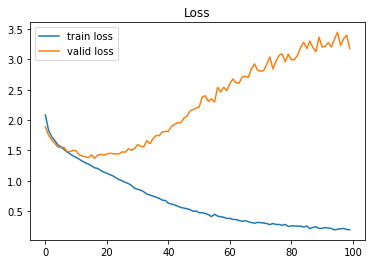

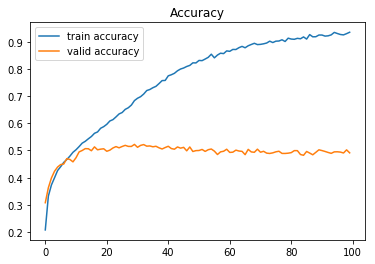

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### GPU version

In [ ]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

In [ ]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()